In [1]:
import aes2_added_fb_prize_as_features_preprocessing

CUDA_AVAILABLE = True


2024-06-30 11:03:04.758746: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-30 11:03:04.835635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 11:03:04.835691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 11:03:04.837257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 11:03:04.848080: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import gc

gc.collect()

48

In [3]:
import pickle

with open("/home/mcq/GitHub/aes2/train_data/train_feats.pkl", "rb") as f:
    train_feats = pickle.load(f)
with open("/home/mcq/GitHub/aes2/train_data/X.pkl", "rb") as f:
    X = pickle.load(f)
with open("/home/mcq/GitHub/aes2/train_data/y.pkl", "rb") as f:
    y = pickle.load(f)
with open("/home/mcq/GitHub/aes2/train_data/y_split.pkl", "rb") as f:
    y_split = pickle.load(f)
with open(
    "/home/mcq/GitHub/aes2/train_data/feature_select.pkl", "rb"
) as f:
    feature_select = pickle.load(f)
    
aes2_added_fb_prize_as_features_preprocessing.feature_select = feature_select

In [4]:
train_feats.iloc[:5, 3:]

,paragraph_75_cnt,paragraph_100_cnt,paragraph_125_cnt,paragraph_150_cnt,paragraph_175_cnt,paragraph_200_cnt,paragraph_250_cnt,paragraph_300_cnt,paragraph_350_cnt,paragraph_400_cnt,...,deberta_oof_4,deberta_oof_5,argument_0,argument_1,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,4,4,4,4,4,4,4,3,2,0,...,0.002071,0.000785,0.184659,0.815341,3.706796,3.907128,3.833184,3.827761,4.201221,3.607211
1,5,5,5,5,5,5,5,5,5,5,...,0.000765,0.000288,0.869833,0.130167,3.934926,3.976297,4.087897,3.972344,4.063921,3.745628
2,3,3,3,3,3,3,3,2,2,2,...,0.433214,0.013603,0.124480,0.875520,3.228268,3.407413,3.359116,3.350634,3.573198,3.116069
3,1,1,1,1,1,1,1,1,1,1,...,0.017782,0.000848,0.675310,0.324690,2.834277,2.853473,2.975927,2.809377,2.771026,2.408534
4,5,5,5,5,5,4,3,3,2,1,...,0.002046,0.000963,0.935159,0.064841,3.119442,3.220823,3.218036,3.108035,3.234186,2.970331


In [5]:
train_feats['essay_id']

0        0000D23A521A
1        00066EA9880D
2        0006ED03C701
3             000d118
4             000fe60
             ...     
30173         ffd378d
30174         ffddf1f
30175         fff016d
30176         fffb49b
30177         fffed3e
Name: essay_id, Length: 30178, dtype: object

In [6]:
X.shape

(30178, 13000)

In [7]:
import numpy as np

def clean_feature_names(features):
    illegal_chars = ['[', ']', '<', '>']
    cleaned_features = []
    for feature in features:
        for char in illegal_chars:
            feature = feature.replace(char, 'lessthan')
        cleaned_features.append(feature)
    return cleaned_features

train_feats.columns = clean_feature_names(train_feats.columns)
feature_select = clean_feature_names(feature_select)


X = train_feats[feature_select].astype(np.float32).values

# Find Threshold

fold 1
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.831076	valid's QWK: 0.829457
[50]	train's QWK: 0.882738	valid's QWK: 0.881455
[75]	train's QWK: 0.888853	valid's QWK: 0.885834
[100]	train's QWK: 0.893093	valid's QWK: 0.88823
[125]	train's QWK: 0.896486	valid's QWK: 0.88965
[150]	train's QWK: 0.899077	valid's QWK: 0.892553
[175]	train's QWK: 0.901016	valid's QWK: 0.892751
[200]	train's QWK: 0.902984	valid's QWK: 0.895041
[225]	train's QWK: 0.904892	valid's QWK: 0.895486
[250]	train's QWK: 0.906969	valid's QWK: 0.896982
[275]	train's QWK: 0.908332	valid's QWK: 0.897427
[300]	train's QWK: 0.910081	v

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:20:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07436	validation_0-QWK:0.48030	validation_1-rmse:1.07954	validation_1-QWK:0.47520
[0]	validation_0-rmse:1.07436	validation_0-QWK:0.48030	validation_1-rmse:1.07954	validation_1-QWK:0.47520
[1]	validation_0-rmse:0.95495	validation_0-QWK:0.48709	validation_1-rmse:0.96389	validation_1-QWK:0.48421
[2]	validation_0-rmse:0.84581	validation_0-QWK:0.51371	validation_1-rmse:0.85881	validation_1-QWK:0.50273
[3]	validation_0-rmse:0.75040	validation_0-QWK:0.65242	validation_1-rmse:0.76720	validation_1-QWK:0.63628
[4]	validation_0-rmse:0.66989	validation_0-QWK:0.71188	validation_1-rmse:0.69032	validation_1-QWK:0.70209
[5]	validation_0-rmse:0.60371	validation_0-QWK:0.73357	validation_1-rmse:0.62721	validation_1-QWK:0.72109
[6]	validation_0-rmse:0.55674	validation_0-QWK:0.74509	validation_1-rmse:0.58315	validation_1-QWK:0.72803
[7]	validation_0-rmse:0.50996	validation_0-QWK:0.78045	validation_1-rmse:0.54002	validation_1-QWK:0.76001
[8]	validation_0-rmse:0.47243	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:22:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_1 XGBoost Model saved.



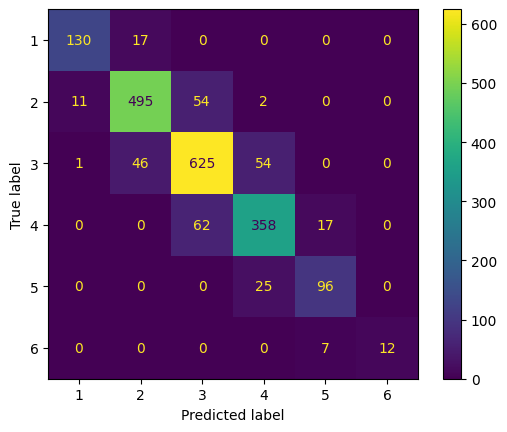

F1 score across fold: 0.852841483655101
Cohen kappa score across fold: 0.9303629261960042
fold 2
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.800182	valid's QWK: 0.807046
[50]	train's QWK: 0.879714	valid's QWK: 0.887446
[75]	train's QWK: 0.885727	valid's QWK: 0.894203
[100]	train's QWK: 0.8911	valid's QWK: 0.898359
[125]	train's QWK: 0.894873	valid's QWK: 0.900207
[150]	train's QWK: 0.898144	valid's QWK: 0.902846
[175]	train's QWK: 0.900072	valid's QWK: 0.904467
[200]	train's QWK: 0.902436	valid's QWK: 0.905198
[225]	train's QWK: 0.904836	valid's QWK: 0.907076
[250]	train's QWK: 0.906936	valid's QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:23:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07462	validation_0-QWK:0.46291	validation_1-rmse:1.07633	validation_1-QWK:0.45960
[0]	validation_0-rmse:1.07462	validation_0-QWK:0.46291	validation_1-rmse:1.07633	validation_1-QWK:0.45960
[1]	validation_0-rmse:0.95533	validation_0-QWK:0.48678	validation_1-rmse:0.95934	validation_1-QWK:0.48354
[2]	validation_0-rmse:0.84637	validation_0-QWK:0.51268	validation_1-rmse:0.85339	validation_1-QWK:0.50629
[3]	validation_0-rmse:0.75091	validation_0-QWK:0.63816	validation_1-rmse:0.76082	validation_1-QWK:0.63829
[4]	validation_0-rmse:0.67041	validation_0-QWK:0.71221	validation_1-rmse:0.68332	validation_1-QWK:0.70346
[5]	validation_0-rmse:0.60406	validation_0-QWK:0.73383	validation_1-rmse:0.61976	validation_1-QWK:0.72519
[6]	validation_0-rmse:0.55709	validation_0-QWK:0.74492	validation_1-rmse:0.57476	validation_1-QWK:0.73595
[7]	validation_0-rmse:0.51024	validation_0-QWK:0.78102	validation_1-rmse:0.53070	validation_1-QWK:0.77170
[8]	validation_0-rmse:0.47257	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:25:17] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_2 XGBoost Model saved.



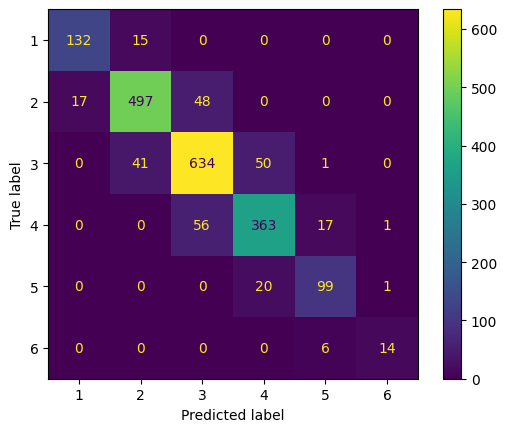

F1 score across fold: 0.8642770103578692
Cohen kappa score across fold: 0.9373080481408004
fold 3
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.815371	valid's QWK: 0.818214
[50]	train's QWK: 0.874791	valid's QWK: 0.879698
[75]	train's QWK: 0.884847	valid's QWK: 0.891652
[100]	train's QWK: 0.890372	valid's QWK: 0.894375
[125]	train's QWK: 0.894367	valid's QWK: 0.898978
[150]	train's QWK: 0.89741	valid's QWK: 0.902116
[175]	train's QWK: 0.899848	valid's QWK: 0.903553
[200]	train's QWK: 0.902185	valid's QWK: 0.905171
[225]	train's QWK: 0.904087	valid's QWK: 0.906342
[250]	train's QWK: 0.906086	valid's Q

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:27:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07449	validation_0-QWK:0.47665	validation_1-rmse:1.07603	validation_1-QWK:0.47843
[0]	validation_0-rmse:1.07449	validation_0-QWK:0.47665	validation_1-rmse:1.07603	validation_1-QWK:0.47843
[1]	validation_0-rmse:0.95517	validation_0-QWK:0.48703	validation_1-rmse:0.95761	validation_1-QWK:0.48718
[2]	validation_0-rmse:0.84643	validation_0-QWK:0.51262	validation_1-rmse:0.85011	validation_1-QWK:0.50732
[3]	validation_0-rmse:0.75106	validation_0-QWK:0.64562	validation_1-rmse:0.75617	validation_1-QWK:0.64218
[4]	validation_0-rmse:0.67040	validation_0-QWK:0.70630	validation_1-rmse:0.67778	validation_1-QWK:0.70576
[5]	validation_0-rmse:0.60413	validation_0-QWK:0.73045	validation_1-rmse:0.61459	validation_1-QWK:0.72435
[6]	validation_0-rmse:0.55741	validation_0-QWK:0.74174	validation_1-rmse:0.57118	validation_1-QWK:0.73452
[7]	validation_0-rmse:0.51073	validation_0-QWK:0.77927	validation_1-rmse:0.52728	validation_1-QWK:0.77056
[8]	validation_0-rmse:0.47298	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:28:33] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_3 XGBoost Model saved.



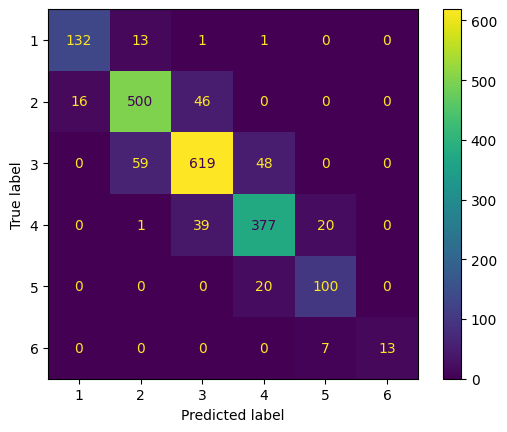

F1 score across fold: 0.8652443192799257
Cohen kappa score across fold: 0.9362076775954582
fold 4
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.814554	valid's QWK: 0.805616
[50]	train's QWK: 0.877095	valid's QWK: 0.869215
[75]	train's QWK: 0.887292	valid's QWK: 0.883079
[100]	train's QWK: 0.892258	valid's QWK: 0.889336
[125]	train's QWK: 0.89582	valid's QWK: 0.89209
[150]	train's QWK: 0.900338	valid's QWK: 0.895618
[175]	train's QWK: 0.902963	valid's QWK: 0.898256
[200]	train's QWK: 0.90531	valid's QWK: 0.897935
[225]	train's QWK: 0.906397	valid's QWK: 0.897856
[250]	train's QWK: 0.907951	valid's QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:30:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07443	validation_0-QWK:0.47679	validation_1-rmse:1.07703	validation_1-QWK:0.47263
[0]	validation_0-rmse:1.07443	validation_0-QWK:0.47679	validation_1-rmse:1.07703	validation_1-QWK:0.47263
[1]	validation_0-rmse:0.95533	validation_0-QWK:0.48784	validation_1-rmse:0.96091	validation_1-QWK:0.48305
[2]	validation_0-rmse:0.84634	validation_0-QWK:0.51165	validation_1-rmse:0.85512	validation_1-QWK:0.50798
[3]	validation_0-rmse:0.75066	validation_0-QWK:0.64696	validation_1-rmse:0.76401	validation_1-QWK:0.63719
[4]	validation_0-rmse:0.66993	validation_0-QWK:0.70583	validation_1-rmse:0.68713	validation_1-QWK:0.69508
[5]	validation_0-rmse:0.60329	validation_0-QWK:0.73101	validation_1-rmse:0.62404	validation_1-QWK:0.71835
[6]	validation_0-rmse:0.55626	validation_0-QWK:0.74486	validation_1-rmse:0.58043	validation_1-QWK:0.72924
[7]	validation_0-rmse:0.50952	validation_0-QWK:0.77440	validation_1-rmse:0.53687	validation_1-QWK:0.77213
[8]	validation_0-rmse:0.47210	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:31:54] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_4 XGBoost Model saved.



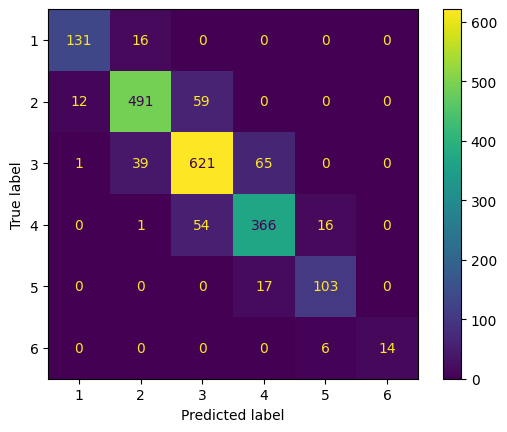

F1 score across fold: 0.8580558095123864
Cohen kappa score across fold: 0.9341268554516468
fold 5
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.82403	valid's QWK: 0.803448
[50]	train's QWK: 0.880104	valid's QWK: 0.863141
[75]	train's QWK: 0.887694	valid's QWK: 0.87414
[100]	train's QWK: 0.891229	valid's QWK: 0.877268
[125]	train's QWK: 0.894454	valid's QWK: 0.880843
[150]	train's QWK: 0.89754	valid's QWK: 0.883085
[175]	train's QWK: 0.899264	valid's QWK: 0.883112
[200]	train's QWK: 0.901673	valid's QWK: 0.884896
[225]	train's QWK: 0.903439	valid's QWK: 0.886179
[250]	train's QWK: 0.904573	valid's QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:33:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07438	validation_0-QWK:0.47730	validation_1-rmse:1.07895	validation_1-QWK:0.46803
[0]	validation_0-rmse:1.07438	validation_0-QWK:0.47730	validation_1-rmse:1.07895	validation_1-QWK:0.46803
[1]	validation_0-rmse:0.95504	validation_0-QWK:0.48721	validation_1-rmse:0.96328	validation_1-QWK:0.48169
[2]	validation_0-rmse:0.84570	validation_0-QWK:0.51158	validation_1-rmse:0.85828	validation_1-QWK:0.50258
[3]	validation_0-rmse:0.74985	validation_0-QWK:0.65280	validation_1-rmse:0.76715	validation_1-QWK:0.63648
[4]	validation_0-rmse:0.66916	validation_0-QWK:0.71257	validation_1-rmse:0.69060	validation_1-QWK:0.69196
[5]	validation_0-rmse:0.60300	validation_0-QWK:0.73389	validation_1-rmse:0.62851	validation_1-QWK:0.71288
[6]	validation_0-rmse:0.55625	validation_0-QWK:0.74673	validation_1-rmse:0.58514	validation_1-QWK:0.72594
[7]	validation_0-rmse:0.50950	validation_0-QWK:0.78079	validation_1-rmse:0.54299	validation_1-QWK:0.76200
[8]	validation_0-rmse:0.47163	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:35:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_5 XGBoost Model saved.



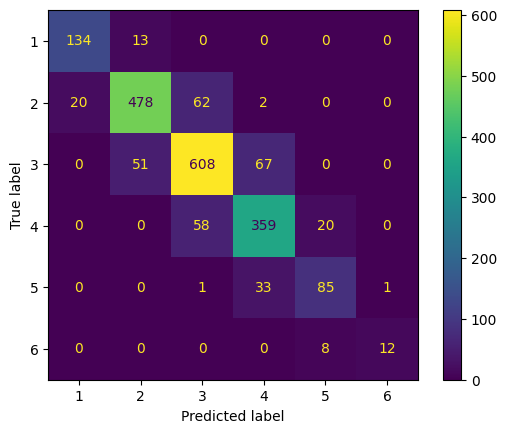

F1 score across fold: 0.8328995928421323
Cohen kappa score across fold: 0.9219515639595993
fold 6
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.819834	valid's QWK: 0.808512
[50]	train's QWK: 0.87708	valid's QWK: 0.861972
[75]	train's QWK: 0.886685	valid's QWK: 0.876828
[100]	train's QWK: 0.8917	valid's QWK: 0.881468
[125]	train's QWK: 0.895172	valid's QWK: 0.886915
[150]	train's QWK: 0.897776	valid's QWK: 0.889185
[175]	train's QWK: 0.900193	valid's QWK: 0.89211
[200]	train's QWK: 0.902968	valid's QWK: 0.892549
[225]	train's QWK: 0.904293	valid's QWK: 0.892609
[250]	train's QWK: 0.906678	valid's QWK:

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:36:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07430	validation_0-QWK:0.47721	validation_1-rmse:1.07753	validation_1-QWK:0.47292
[0]	validation_0-rmse:1.07430	validation_0-QWK:0.47721	validation_1-rmse:1.07753	validation_1-QWK:0.47292
[1]	validation_0-rmse:0.95481	validation_0-QWK:0.48782	validation_1-rmse:0.96016	validation_1-QWK:0.48322
[2]	validation_0-rmse:0.84588	validation_0-QWK:0.51211	validation_1-rmse:0.85435	validation_1-QWK:0.51089
[3]	validation_0-rmse:0.75017	validation_0-QWK:0.64596	validation_1-rmse:0.76275	validation_1-QWK:0.63648
[4]	validation_0-rmse:0.66952	validation_0-QWK:0.71218	validation_1-rmse:0.68516	validation_1-QWK:0.69493
[5]	validation_0-rmse:0.60327	validation_0-QWK:0.73370	validation_1-rmse:0.62335	validation_1-QWK:0.71539
[6]	validation_0-rmse:0.55669	validation_0-QWK:0.74553	validation_1-rmse:0.57992	validation_1-QWK:0.72827
[7]	validation_0-rmse:0.50987	validation_0-QWK:0.78226	validation_1-rmse:0.53721	validation_1-QWK:0.76408
[8]	validation_0-rmse:0.47225	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:38:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_6 XGBoost Model saved.



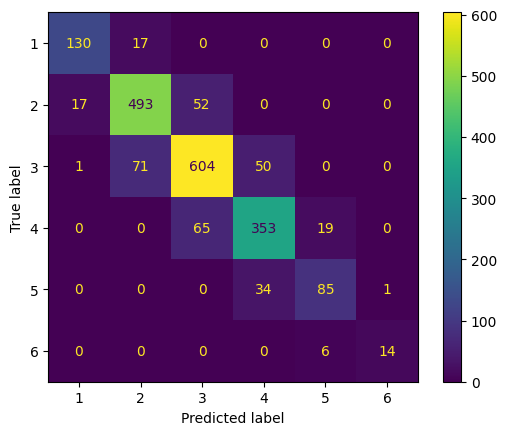

F1 score across fold: 0.8340690607881825
Cohen kappa score across fold: 0.9238319632373669
fold 7
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.812619	valid's QWK: 0.813836
[50]	train's QWK: 0.879553	valid's QWK: 0.882792
[75]	train's QWK: 0.888789	valid's QWK: 0.892935
[100]	train's QWK: 0.893069	valid's QWK: 0.896899
[125]	train's QWK: 0.896053	valid's QWK: 0.898407
[150]	train's QWK: 0.899388	valid's QWK: 0.90181
[175]	train's QWK: 0.901435	valid's QWK: 0.902386
[200]	train's QWK: 0.903097	valid's QWK: 0.904576
[225]	train's QWK: 0.904958	valid's QWK: 0.904648
[250]	train's QWK: 0.906578	valid's Q

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:40:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07440	validation_0-QWK:0.46125	validation_1-rmse:1.07621	validation_1-QWK:0.46103
[0]	validation_0-rmse:1.07440	validation_0-QWK:0.46125	validation_1-rmse:1.07621	validation_1-QWK:0.46103
[1]	validation_0-rmse:0.95532	validation_0-QWK:0.48673	validation_1-rmse:0.95852	validation_1-QWK:0.48385
[2]	validation_0-rmse:0.84634	validation_0-QWK:0.51426	validation_1-rmse:0.85210	validation_1-QWK:0.50494
[3]	validation_0-rmse:0.75075	validation_0-QWK:0.63728	validation_1-rmse:0.75921	validation_1-QWK:0.63144
[4]	validation_0-rmse:0.67044	validation_0-QWK:0.70731	validation_1-rmse:0.68208	validation_1-QWK:0.69626
[5]	validation_0-rmse:0.60428	validation_0-QWK:0.73247	validation_1-rmse:0.61873	validation_1-QWK:0.71221
[6]	validation_0-rmse:0.55782	validation_0-QWK:0.74533	validation_1-rmse:0.57454	validation_1-QWK:0.72978
[7]	validation_0-rmse:0.51122	validation_0-QWK:0.77991	validation_1-rmse:0.53084	validation_1-QWK:0.76531
[8]	validation_0-rmse:0.47362	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:41:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_7 XGBoost Model saved.



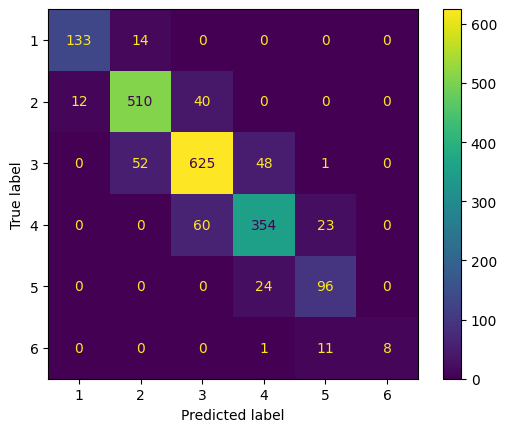

F1 score across fold: 0.8570507720976741
Cohen kappa score across fold: 0.9337553268811273
fold 8
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.81227	valid's QWK: 0.816608
[50]	train's QWK: 0.881644	valid's QWK: 0.885126
[75]	train's QWK: 0.88841	valid's QWK: 0.890322
[100]	train's QWK: 0.892172	valid's QWK: 0.894301
[125]	train's QWK: 0.895542	valid's QWK: 0.894428
[150]	train's QWK: 0.897826	valid's QWK: 0.896809
[175]	train's QWK: 0.899989	valid's QWK: 0.89904
[200]	train's QWK: 0.90243	valid's QWK: 0.900742
[225]	train's QWK: 0.903743	valid's QWK: 0.901513
[250]	train's QWK: 0.905774	valid's QWK:

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:43:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07479	validation_0-QWK:0.47602	validation_1-rmse:1.07494	validation_1-QWK:0.47390
[0]	validation_0-rmse:1.07479	validation_0-QWK:0.47602	validation_1-rmse:1.07494	validation_1-QWK:0.47390
[1]	validation_0-rmse:0.95525	validation_0-QWK:0.48643	validation_1-rmse:0.95638	validation_1-QWK:0.48642
[2]	validation_0-rmse:0.84665	validation_0-QWK:0.51026	validation_1-rmse:0.84794	validation_1-QWK:0.51877
[3]	validation_0-rmse:0.75080	validation_0-QWK:0.64705	validation_1-rmse:0.75423	validation_1-QWK:0.65339
[4]	validation_0-rmse:0.67055	validation_0-QWK:0.71145	validation_1-rmse:0.67701	validation_1-QWK:0.70488
[5]	validation_0-rmse:0.60424	validation_0-QWK:0.73230	validation_1-rmse:0.61312	validation_1-QWK:0.72957
[6]	validation_0-rmse:0.55733	validation_0-QWK:0.74577	validation_1-rmse:0.56984	validation_1-QWK:0.74309
[7]	validation_0-rmse:0.51088	validation_0-QWK:0.77080	validation_1-rmse:0.52645	validation_1-QWK:0.76604
[8]	validation_0-rmse:0.47326	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:44:45] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_8 XGBoost Model saved.



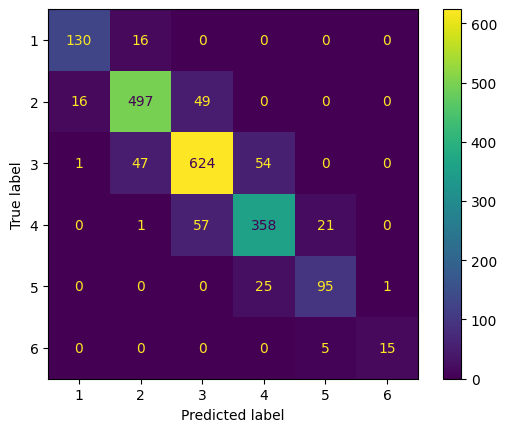

F1 score across fold: 0.8543495325570434
Cohen kappa score across fold: 0.9327541008967938
fold 9
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.818853	valid's QWK: 0.810045
[50]	train's QWK: 0.882213	valid's QWK: 0.871734
[75]	train's QWK: 0.889986	valid's QWK: 0.881761
[100]	train's QWK: 0.89397	valid's QWK: 0.884907
[125]	train's QWK: 0.897027	valid's QWK: 0.888396
[150]	train's QWK: 0.900616	valid's QWK: 0.891545
[175]	train's QWK: 0.902123	valid's QWK: 0.891947
[200]	train's QWK: 0.90449	valid's QWK: 0.892954
[225]	train's QWK: 0.906748	valid's QWK: 0.893744
[250]	train's QWK: 0.908599	valid's QW

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:46:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07458	validation_0-QWK:0.47482	validation_1-rmse:1.07634	validation_1-QWK:0.47312
[0]	validation_0-rmse:1.07458	validation_0-QWK:0.47482	validation_1-rmse:1.07634	validation_1-QWK:0.47312
[1]	validation_0-rmse:0.95520	validation_0-QWK:0.48701	validation_1-rmse:0.96012	validation_1-QWK:0.48331
[2]	validation_0-rmse:0.84632	validation_0-QWK:0.51067	validation_1-rmse:0.85396	validation_1-QWK:0.50510
[3]	validation_0-rmse:0.75100	validation_0-QWK:0.64631	validation_1-rmse:0.76250	validation_1-QWK:0.62869
[4]	validation_0-rmse:0.67041	validation_0-QWK:0.70985	validation_1-rmse:0.68550	validation_1-QWK:0.69218
[5]	validation_0-rmse:0.60401	validation_0-QWK:0.73201	validation_1-rmse:0.62334	validation_1-QWK:0.71389
[6]	validation_0-rmse:0.55711	validation_0-QWK:0.74571	validation_1-rmse:0.57943	validation_1-QWK:0.73377
[7]	validation_0-rmse:0.51047	validation_0-QWK:0.76848	validation_1-rmse:0.53745	validation_1-QWK:0.75648
[8]	validation_0-rmse:0.47302	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:48:02] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_9 XGBoost Model saved.



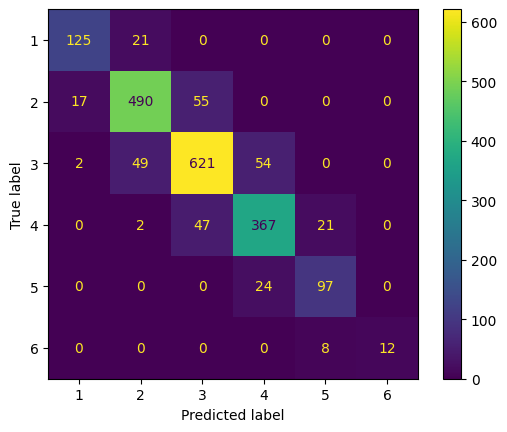

F1 score across fold: 0.8508227745090724
Cohen kappa score across fold: 0.9295492432770088
fold 10
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.817597	valid's QWK: 0.810262
[50]	train's QWK: 0.878486	valid's QWK: 0.884977
[75]	train's QWK: 0.885334	valid's QWK: 0.890935
[100]	train's QWK: 0.890385	valid's QWK: 0.895432
[125]	train's QWK: 0.894951	valid's QWK: 0.897953
[150]	train's QWK: 0.89785	valid's QWK: 0.899989
[175]	train's QWK: 0.900937	valid's QWK: 0.901559
[200]	train's QWK: 0.903229	valid's QWK: 0.902493
[225]	train's QWK: 0.905459	valid's QWK: 0.902699
[250]	train's QWK: 0.907228	valid's 

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:49:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07459	validation_0-QWK:0.46341	validation_1-rmse:1.07582	validation_1-QWK:0.46230
[0]	validation_0-rmse:1.07459	validation_0-QWK:0.46341	validation_1-rmse:1.07582	validation_1-QWK:0.46230
[1]	validation_0-rmse:0.95562	validation_0-QWK:0.48752	validation_1-rmse:0.95870	validation_1-QWK:0.48597
[2]	validation_0-rmse:0.84662	validation_0-QWK:0.51585	validation_1-rmse:0.85221	validation_1-QWK:0.50822
[3]	validation_0-rmse:0.75120	validation_0-QWK:0.63984	validation_1-rmse:0.75940	validation_1-QWK:0.62979
[4]	validation_0-rmse:0.67085	validation_0-QWK:0.70614	validation_1-rmse:0.68222	validation_1-QWK:0.70684
[5]	validation_0-rmse:0.60463	validation_0-QWK:0.73083	validation_1-rmse:0.61963	validation_1-QWK:0.72461
[6]	validation_0-rmse:0.55797	validation_0-QWK:0.74440	validation_1-rmse:0.57696	validation_1-QWK:0.73842
[7]	validation_0-rmse:0.51120	validation_0-QWK:0.78021	validation_1-rmse:0.53385	validation_1-QWK:0.76982
[8]	validation_0-rmse:0.47395	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:51:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_10 XGBoost Model saved.



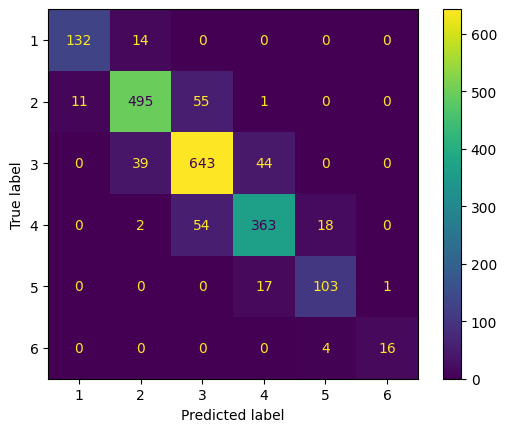

F1 score across fold: 0.8708134206053348
Cohen kappa score across fold: 0.9393382517767189
fold 11
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.821012	valid's QWK: 0.825921
[50]	train's QWK: 0.878988	valid's QWK: 0.885649
[75]	train's QWK: 0.886489	valid's QWK: 0.891366
[100]	train's QWK: 0.891034	valid's QWK: 0.896072
[125]	train's QWK: 0.89411	valid's QWK: 0.900709
[150]	train's QWK: 0.897845	valid's QWK: 0.903118
[175]	train's QWK: 0.900634	valid's QWK: 0.904706
[200]	train's QWK: 0.902373	valid's QWK: 0.905309
[225]	train's QWK: 0.904176	valid's QWK: 0.905669
[250]	train's QWK: 0.905307	valid's 

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:53:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07459	validation_0-QWK:0.47551	validation_1-rmse:1.07495	validation_1-QWK:0.47267
[0]	validation_0-rmse:1.07459	validation_0-QWK:0.47551	validation_1-rmse:1.07495	validation_1-QWK:0.47267
[1]	validation_0-rmse:0.95535	validation_0-QWK:0.48621	validation_1-rmse:0.95658	validation_1-QWK:0.48655
[2]	validation_0-rmse:0.84649	validation_0-QWK:0.51041	validation_1-rmse:0.84928	validation_1-QWK:0.50982
[3]	validation_0-rmse:0.75116	validation_0-QWK:0.64309	validation_1-rmse:0.75552	validation_1-QWK:0.65229
[4]	validation_0-rmse:0.67033	validation_0-QWK:0.70907	validation_1-rmse:0.67789	validation_1-QWK:0.70720
[5]	validation_0-rmse:0.60400	validation_0-QWK:0.73306	validation_1-rmse:0.61461	validation_1-QWK:0.72525
[6]	validation_0-rmse:0.55728	validation_0-QWK:0.74689	validation_1-rmse:0.56922	validation_1-QWK:0.73749
[7]	validation_0-rmse:0.51045	validation_0-QWK:0.78020	validation_1-rmse:0.52615	validation_1-QWK:0.76957
[8]	validation_0-rmse:0.47283	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:54:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_11 XGBoost Model saved.



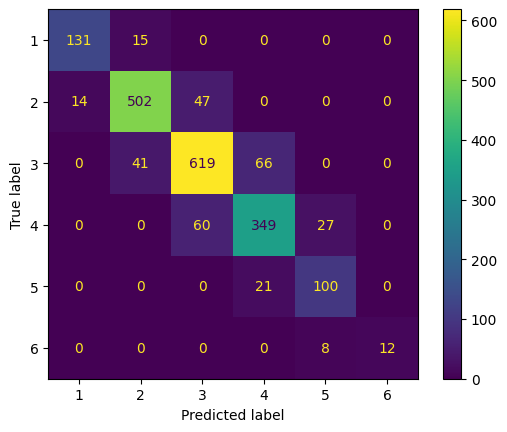

F1 score across fold: 0.8515012396015007
Cohen kappa score across fold: 0.9329095786869465
fold 12
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.81645	valid's QWK: 0.818386
[50]	train's QWK: 0.877457	valid's QWK: 0.881112
[75]	train's QWK: 0.886281	valid's QWK: 0.882757
[100]	train's QWK: 0.89104	valid's QWK: 0.887531
[125]	train's QWK: 0.894541	valid's QWK: 0.889831
[150]	train's QWK: 0.896899	valid's QWK: 0.891586
[175]	train's QWK: 0.900045	valid's QWK: 0.89386
[200]	train's QWK: 0.902277	valid's QWK: 0.896888
[225]	train's QWK: 0.904645	valid's QWK: 0.898141
[250]	train's QWK: 0.906076	valid's QW

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:56:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07427	validation_0-QWK:0.48391	validation_1-rmse:1.07452	validation_1-QWK:0.48099
[0]	validation_0-rmse:1.07427	validation_0-QWK:0.48391	validation_1-rmse:1.07452	validation_1-QWK:0.48099
[1]	validation_0-rmse:0.95499	validation_0-QWK:0.48610	validation_1-rmse:0.95560	validation_1-QWK:0.48417
[2]	validation_0-rmse:0.84621	validation_0-QWK:0.51366	validation_1-rmse:0.84770	validation_1-QWK:0.50954
[3]	validation_0-rmse:0.75045	validation_0-QWK:0.63998	validation_1-rmse:0.75392	validation_1-QWK:0.63060
[4]	validation_0-rmse:0.66980	validation_0-QWK:0.70899	validation_1-rmse:0.67561	validation_1-QWK:0.69931
[5]	validation_0-rmse:0.60353	validation_0-QWK:0.73426	validation_1-rmse:0.61203	validation_1-QWK:0.72421
[6]	validation_0-rmse:0.55665	validation_0-QWK:0.74652	validation_1-rmse:0.56817	validation_1-QWK:0.73682
[7]	validation_0-rmse:0.50996	validation_0-QWK:0.78384	validation_1-rmse:0.52493	validation_1-QWK:0.77333
[8]	validation_0-rmse:0.47233	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:57:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_12 XGBoost Model saved.



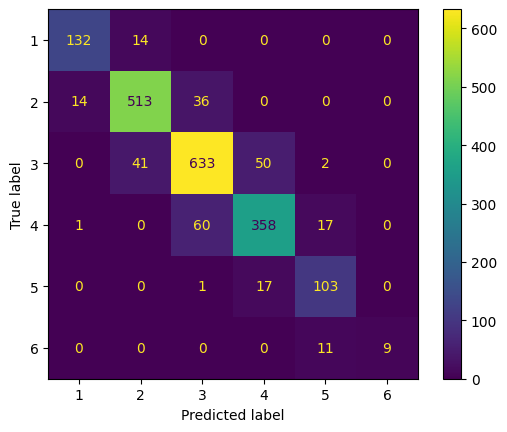

F1 score across fold: 0.8681232482004363
Cohen kappa score across fold: 0.9364864458014046
fold 13
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.823258	valid's QWK: 0.812533
[50]	train's QWK: 0.881756	valid's QWK: 0.87853
[75]	train's QWK: 0.889114	valid's QWK: 0.884887
[100]	train's QWK: 0.893404	valid's QWK: 0.889906
[125]	train's QWK: 0.896957	valid's QWK: 0.893332
[150]	train's QWK: 0.900404	valid's QWK: 0.896604
[175]	train's QWK: 0.902431	valid's QWK: 0.898175
[200]	train's QWK: 0.904698	valid's QWK: 0.899507
[225]	train's QWK: 0.906327	valid's QWK: 0.898277
[250]	train's QWK: 0.907928	valid's 

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [11:58:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07437	validation_0-QWK:0.47678	validation_1-rmse:1.07641	validation_1-QWK:0.47196
[0]	validation_0-rmse:1.07437	validation_0-QWK:0.47678	validation_1-rmse:1.07641	validation_1-QWK:0.47196
[1]	validation_0-rmse:0.95511	validation_0-QWK:0.48679	validation_1-rmse:0.95839	validation_1-QWK:0.48248
[2]	validation_0-rmse:0.84603	validation_0-QWK:0.51291	validation_1-rmse:0.85244	validation_1-QWK:0.50477
[3]	validation_0-rmse:0.75035	validation_0-QWK:0.64331	validation_1-rmse:0.75940	validation_1-QWK:0.63110
[4]	validation_0-rmse:0.66977	validation_0-QWK:0.70550	validation_1-rmse:0.68174	validation_1-QWK:0.69482
[5]	validation_0-rmse:0.60320	validation_0-QWK:0.73237	validation_1-rmse:0.61920	validation_1-QWK:0.71125
[6]	validation_0-rmse:0.55626	validation_0-QWK:0.74650	validation_1-rmse:0.57588	validation_1-QWK:0.72659
[7]	validation_0-rmse:0.50935	validation_0-QWK:0.78326	validation_1-rmse:0.53346	validation_1-QWK:0.76153
[8]	validation_0-rmse:0.47176	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:00:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_13 XGBoost Model saved.



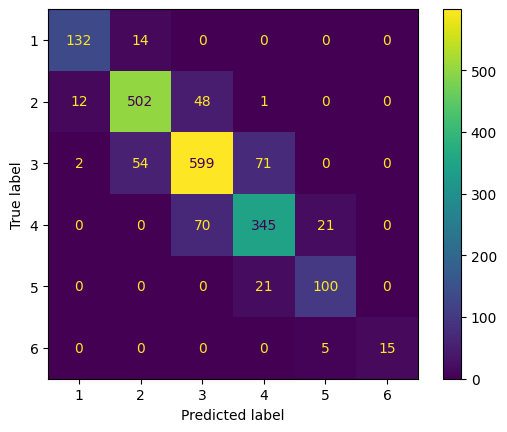

F1 score across fold: 0.8414331800473813
Cohen kappa score across fold: 0.9265106150121303
fold 14
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.831101	valid's QWK: 0.833325
[50]	train's QWK: 0.881508	valid's QWK: 0.883636
[75]	train's QWK: 0.888804	valid's QWK: 0.891997
[100]	train's QWK: 0.894479	valid's QWK: 0.896543
[125]	train's QWK: 0.896651	valid's QWK: 0.898124
[150]	train's QWK: 0.899699	valid's QWK: 0.900585
[175]	train's QWK: 0.902394	valid's QWK: 0.902918
[200]	train's QWK: 0.904405	valid's QWK: 0.904269
[225]	train's QWK: 0.906723	valid's QWK: 0.906809
[250]	train's QWK: 0.907981	valid's

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:02:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07468	validation_0-QWK:0.47865	validation_1-rmse:1.07681	validation_1-QWK:0.47339
[0]	validation_0-rmse:1.07468	validation_0-QWK:0.47865	validation_1-rmse:1.07681	validation_1-QWK:0.47339
[1]	validation_0-rmse:0.95528	validation_0-QWK:0.48595	validation_1-rmse:0.95954	validation_1-QWK:0.48019
[2]	validation_0-rmse:0.84619	validation_0-QWK:0.50954	validation_1-rmse:0.85314	validation_1-QWK:0.50235
[3]	validation_0-rmse:0.75059	validation_0-QWK:0.65149	validation_1-rmse:0.75961	validation_1-QWK:0.63748
[4]	validation_0-rmse:0.67007	validation_0-QWK:0.70941	validation_1-rmse:0.68169	validation_1-QWK:0.69138
[5]	validation_0-rmse:0.60370	validation_0-QWK:0.73055	validation_1-rmse:0.61814	validation_1-QWK:0.71440
[6]	validation_0-rmse:0.55686	validation_0-QWK:0.74495	validation_1-rmse:0.57381	validation_1-QWK:0.72569
[7]	validation_0-rmse:0.50978	validation_0-QWK:0.76870	validation_1-rmse:0.52989	validation_1-QWK:0.75057
[8]	validation_0-rmse:0.47211	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:03:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_14 XGBoost Model saved.



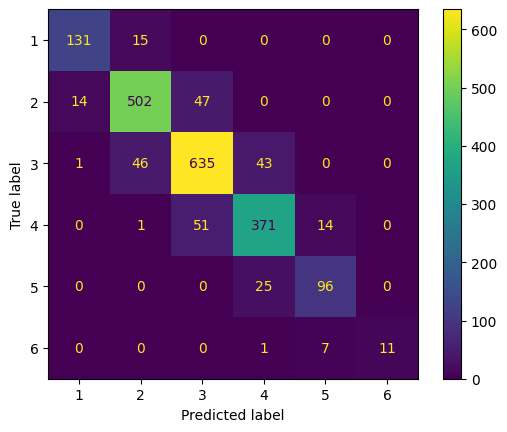

F1 score across fold: 0.8679005590243174
Cohen kappa score across fold: 0.9373909767123076
fold 15
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=8) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=256) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.813789	valid's QWK: 0.802232
[50]	train's QWK: 0.871374	valid's QWK: 0.863583
[75]	train's QWK: 0.885778	valid's QWK: 0.877054
[100]	train's QWK: 0.891609	valid's QWK: 0.880646
[125]	train's QWK: 0.894285	valid's QWK: 0.881234
[150]	train's QWK: 0.897889	valid's QWK: 0.884765
[175]	train's QWK: 0.900123	valid's QWK: 0.885186
[200]	train's QWK: 0.902265	valid's QWK: 0.888169
[225]	train's QWK: 0.903756	valid's QWK: 0.889406
[250]	train's QWK: 0.904987	valid's

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:05:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "extra_trees", "metrics", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:1.07461	validation_0-QWK:0.47629	validation_1-rmse:1.07692	validation_1-QWK:0.47079
[0]	validation_0-rmse:1.07461	validation_0-QWK:0.47629	validation_1-rmse:1.07692	validation_1-QWK:0.47079
[1]	validation_0-rmse:0.95518	validation_0-QWK:0.48520	validation_1-rmse:0.96209	validation_1-QWK:0.47968
[2]	validation_0-rmse:0.84585	validation_0-QWK:0.51089	validation_1-rmse:0.85719	validation_1-QWK:0.50839
[3]	validation_0-rmse:0.75021	validation_0-QWK:0.65034	validation_1-rmse:0.76536	validation_1-QWK:0.62713
[4]	validation_0-rmse:0.66974	validation_0-QWK:0.70676	validation_1-rmse:0.68997	validation_1-QWK:0.69168
[5]	validation_0-rmse:0.60362	validation_0-QWK:0.73050	validation_1-rmse:0.62970	validation_1-QWK:0.71706
[6]	validation_0-rmse:0.55677	validation_0-QWK:0.74261	validation_1-rmse:0.58724	validation_1-QWK:0.72931
[7]	validation_0-rmse:0.50973	validation_0-QWK:0.78046	validation_1-rmse:0.54535	validation_1-QWK:0.76229
[8]	validation_0-rmse:0.47237	validation_0-QWK

/home/mcq/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:07:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)



Fold_15 XGBoost Model saved.



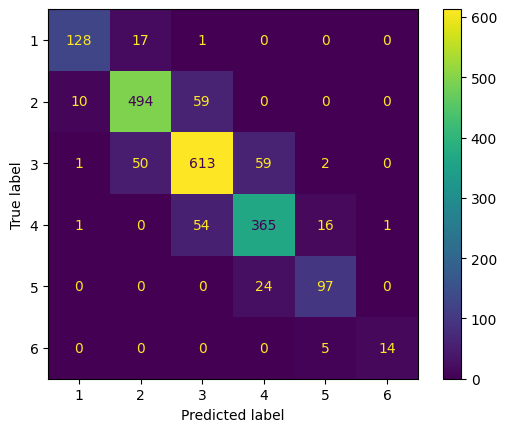

F1 score across fold: 0.850936246103032
Cohen kappa score across fold: 0.9267609950175607


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score
from aes2_added_fb_prize_as_features_preprocessing import *



def find_thresholds(true, pred, steps=50):

    # SAVE TRIALS FOR PLOTTING
    xs = [[],[],[],[],[]]
    ys = [[],[],[],[],[]]

    # COMPUTE BASELINE METRIC
    threshold = [1.5, 2.5, 3.5, 4.5, 5.5]
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")

    # FIND FIVE OPTIMAL THRESHOLDS
    for k in range(5):
        for sign in [1,-1]:
            v = threshold[k]
            threshold2 = threshold.copy()
            stop = 0
            while stop<steps:

                # TRY NEW THRESHOLD
                v += sign * 0.01
                threshold2[k] = v
                pred2 = pd.cut(pred, [-np.inf] + threshold2 + [np.inf], 
                                labels=[1,2,3,4,5,6]).astype('int32')
                metric = cohen_kappa_score(true, pred2, weights="quadratic")

                # SAVE TRIALS FOR PLOTTING
                xs[k].append(v)
                ys[k].append(metric)

                # EARLY STOPPING
                if metric<=best:
                    stop += 1
                else:
                    stop = 0
                    best = metric
                    threshold = threshold2.copy()

    # COMPUTE FINAL METRIC
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")   

    # RETURN RESULTS
    threshold = [np.round(t,3) for t in threshold]
    return best, threshold, xs, ys

# best, thresholds, xs, ys = find_thresholds(y_split, oof, steps=500)
# print('Best thresholds are:', thresholds )
# print('=> achieve Overall CV QWK score =', best )

# >> Output: thresholds = [1.5, 2.6, 3.5, 4.59, 5.55]
thresholds = [1.51, 2.6, 3.5, 4.59, 5.56]







models = []
predictions = []
f1_scores = []
kappa_scores = []

tuner_params = {
    "gpu_id" : 8,
    "learning_rate_lgb": 0.05,
    "max_depth_lgb": 8,
    "num_leaves_lgb": 10,
    "colsample_bytree_lgb": 0.3,
    "reg_alpha_lgb": 0.7,
    "reg_lambda_lgb": 0.1,
    "n_estimators_lgb": 700,
    "learning_rate_xgb": 0.1,
    "max_depth_xgb": 8,
    "num_leaves_xgb": 10,
    "colsample_bytree_xgb": 0.5,
    "reg_alpha_xgb": 0.1,
    "reg_lambda_xgb": 0.8,
    "n_estimators_xgb": 1024,
    "n_splits": 15
}

n_splits = tuner_params['n_splits']
oof = np.zeros(len(train), dtype='float32')

class Predictor:
    def __init__(self, models: list):
        self.models = models
#         self.xgb_boost_best_iter = models[1].
    def predict(self, X):
        n_models = len(self.models)
        predicted = None
        n = 0.749
        # n = 0.79 #0.824参数
        for i, model in enumerate(self.models):
            if i == 0:
                predicted = n*model.predict(X)
            else:
                # if not isinstance(X, xgb.DMatrix):
                #     X = xgb.DMatrix(X)
                predicted += (1-n)*model.predict(X)
        return predicted

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
xgboost_best_iters = []
light_best_iters = []
# thresholds = [1.5, 2.5, 3.5, 4.5, 5.5] # init threshold


LOAD = True # re-train
if not LOAD:
    for i in range(n_splits):
        random_indices = np.random.choice(X.shape[0], size=5000, replace=False)
        random_test_X = X[random_indices, :]
        random_test_y = y_split[random_indices]
        lgb_predictor = lgb.Booster(model_file=f'kaggle/input/3models/aes-lgbm/fold_{i+1}.txt')
        # cat_model = CatBoostRegressor()
        # cat_model.load_model(f'kaggle/input/aes-catboost/fold_{i+1}.cbm')
        xgb_regressor = xgb.Booster()
        xgb_regressor.load_model(f'kaggle/input/3models/aes-xgboost/fold_{i+1}.bin')

        predictor = Predictor([lgb_predictor, xgb_regressor])
        
        models.append(predictor)
        
        # # Make predictions on the test data for this fold
        #         # Make predictions on the test data for this fold
        predictions_fold = predictor.predict(random_test_X)
        predictions_fold = predictions_fold + a
        predictions_fold = predictions_fold.clip(1, 6).round().astype(int)
        
        # # Confusion Matrix for each fold
        # cm = confusion_matrix(random_test_y, predictions_fold, labels=[x for x in range(1,7)])
        # disp = ConfusionMatrixDisplay(confusion_matrix=cm,
        #                               display_labels=[x for x in range(1,7)])
        # disp.plot()
        # plt.show()
        
        # # Calculate and store the F1 score for this fold
        f1_fold = f1_score(random_test_y, predictions_fold, average='weighted')
        f1_scores.append(f1_fold)

        # Calculate and store the Cohen's kappa score for this fold
        kappa_fold = cohen_kappa_score(random_test_y, predictions_fold, weights='quadratic')
        kappa_scores.append(kappa_fold)

        print(f'F1 score across fold: {f1_fold}')
        print(f'Cohen kappa score across fold: {kappa_fold}')
        gc.collect()
else:
    for i, (train_index, test_index) in enumerate(skf.split(X, y_split), 1):
    # Split the data into training and testing sets for this fold
        print('fold',i)
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]
        callbacks = [log_evaluation(period=25), early_stopping(stopping_rounds=75,first_metric_only=True)]
        light = lgb.LGBMRegressor(
                objective = qwk_obj,
                metrics = 'None',
                learning_rate = tuner_params["learning_rate_lgb"],
                max_depth = tuner_params["max_depth_lgb"],
                num_leaves = tuner_params["num_leaves_lgb"],
                colsample_bytree = tuner_params["colsample_bytree_lgb"],
                reg_alpha = tuner_params["reg_alpha_lgb"],
                reg_lambda = tuner_params["reg_lambda_lgb"],
                n_estimators = tuner_params["n_estimators_lgb"],
                random_state=42,
                extra_trees=True,
                class_weight='balanced',
                # device='gpu' if CUDA_AVAILABLE else 'cpu',
                # device_type="gpu",
                verbosity = - 1
            )

        # Fit the model on the training data for this fold  
        light.fit(
            X_train_fold,
            y_train_fold,
            eval_names=['train', 'valid'],
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=callbacks
        )
        light_best_iters.append(light.best_iteration_)
        
        
        light.booster_.save_model(f'kaggle/out/aes-lgbm/fold_{i}.txt')
        print('\nFold_{} LightGBM Model saved.\n'.format(i))
        
        
        xgb_callbacks = [
            xgb.callback.EvaluationMonitor(period=25),
            xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True)
        ]
        xgb_regressor = xgb.XGBRegressor(
            objective = qwk_obj,
            metrics = 'None',
            learning_rate = tuner_params["learning_rate_xgb"],
            max_depth = tuner_params["max_depth_xgb"],
            num_leaves = tuner_params["num_leaves_xgb"],
            colsample_bytree = tuner_params["colsample_bytree_xgb"],
            reg_alpha = tuner_params["reg_alpha_xgb"],
            reg_lambda = tuner_params["reg_lambda_xgb"],
            n_estimators = tuner_params["n_estimators_xgb"],
            random_state=42,
            extra_trees=True,
            # scale_pos_weight=100, # 0.824的参数
            class_weight='balanced',
            tree_method="hist",
            # device="gpu" if CUDA_AVAILABLE else "cpu",
            gpu_id = tuner_params["gpu_id"]
        #             device='gpu',
        #             verbosity = 1
        )
        
        xgb_callbacks = [
            xgb.callback.EvaluationMonitor(period=25),
            xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True)
        ]
        xgb_regressor.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=xgb_callbacks
        )
        xgboost_best_iters.append(xgb_regressor.get_booster().best_iteration)
        
        xgb_regressor.save_model(f'kaggle/out/aes-xgboost/fold_{i}.bin')
        print('\nFold_{} XGBoost Model saved.\n'.format(i)) 
        
        predictor = Predictor([light, xgb_regressor])
        
        models.append(predictor)
        # Make predictions on the test data for this fold
        predictions_fold = predictor.predict(X_test_fold)
        predictions_fold = predictions_fold + a
        
        
        # predictions_fold = pd.cut(
        #     predictions_fold, [-np.inf] + thresholds + [np.inf], 
        #     labels=[1,2,3,4,5,6]
        #     ).astype('int32')
        # oof[test_index] = predictions_fold
        
        predictions_fold = predictions_fold.clip(1, 6).round()
        predictions.append(predictions_fold)
        # Calculate and store the F1 score for this fold
        f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')
        f1_scores.append(f1_fold)

        # Calculate and store the Cohen's kappa score for this fold
        kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
        kappa_scores.append(kappa_fold)
    #         predictor.booster_.save_model(f'fold_{i}.txt')
        cm = confusion_matrix(y_test_fold_int, predictions_fold, labels=[x for x in range(1,7)])

        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm,
            display_labels=[x for x in range(1,7)]
        )
        disp.plot()
        plt.show()
        print(f'F1 score across fold: {f1_fold}')
        print(f'Cohen kappa score across fold: {kappa_fold}')

        gc.collect()
        #if ENABLE_DONT_WASTE_YOUR_RUN_TIME:
        #    break


In [11]:
mean_f1_score = np.mean(f1_scores)
mean_kappa_score = np.mean(kappa_scores)
# Print the mean scores
print(f'Mean F1 score across {n_splits} folds: {mean_f1_score}')
print(f'Mean Cohen kappa score across {n_splits} folds: {mean_kappa_score}')
# print(f"XGBoost mean best iters: {sum(xgboost_best_iters)/len(xgboost_best_iters)}")
# print(f"LightBoost mean best iters: {sum(light_best_iters)/len(light_best_iters)}")

Mean F1 score across 15 folds: 0.8546878832787593
Mean Cohen kappa score across 15 folds: 0.9319496379095251


In [1]:

# from aes2_added_fb_prize_as_features_preprocessing import preprocess_test, infer
import aes2_added_fb_prize_as_features_preprocessing

test_feats = aes2_added_fb_prize_as_features_preprocessing.preprocess_test()
test_feats.columns = clean_feature_names(test_feats.columns)
aes2_added_fb_prize_as_features_preprocessing.infer(test_feats, models)


CUDA_AVAILABLE = True


2024-06-30 00:26:31.752221: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-30 00:26:31.811654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 00:26:31.811699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 00:26:31.813008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-30 00:26:31.821909: I tensorflow/core/platform/cpu_feature_guar

KeyboardInterrupt: 